In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from mpl_toolkits.mplot3d import Axes3D  
%matplotlib inline 

In [2]:
df = pd.read_csv("creditcard.csv")

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [39]:
train, test = train_test_split(df, test_size=0.3)
X = train.drop(['Time','Class'], axis=1)
Y = train['Class']

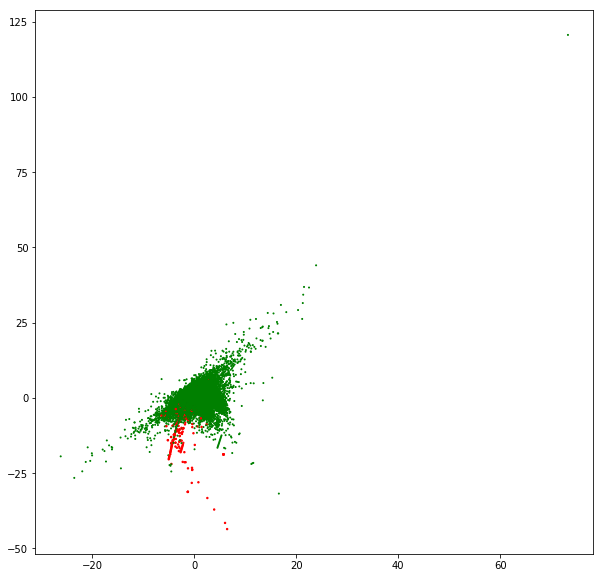

In [36]:
colors = { 1:'red',0:'green'}

plt.figure(figsize=(10,10))
plt.scatter(df.V6,df.V7,s=df.Class+1, c=df.Class.apply(lambda x: colors[x]))
# plt.xlabel('Green: Non-fraud, Red: Fraud')
plt.show()

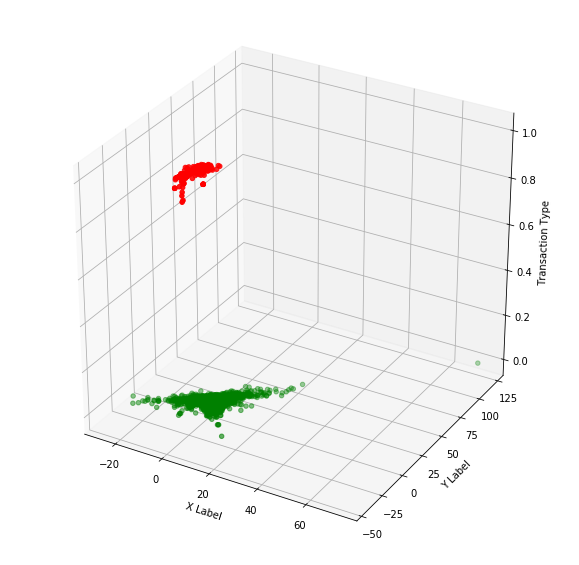

In [31]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df.V6,df.V7,df.Class, c=df.Class.apply(lambda x: colors[x]))
ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Transaction Type')

plt.show()


In [57]:
import sys, os
import matplotlib.pyplot as plt
from sklearn import svm

In [58]:
clf = svm.SVC(kernel='rbf', C = 10.0, gamma=0.1)
clf.fit(X[['V6','V7']], Y)

SVC(C=10.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [50]:
xx, yy = np.meshgrid(np.linspace(-125, 125, 500),np.linspace(-125, 125, 500))

In [51]:
Z = clf2.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

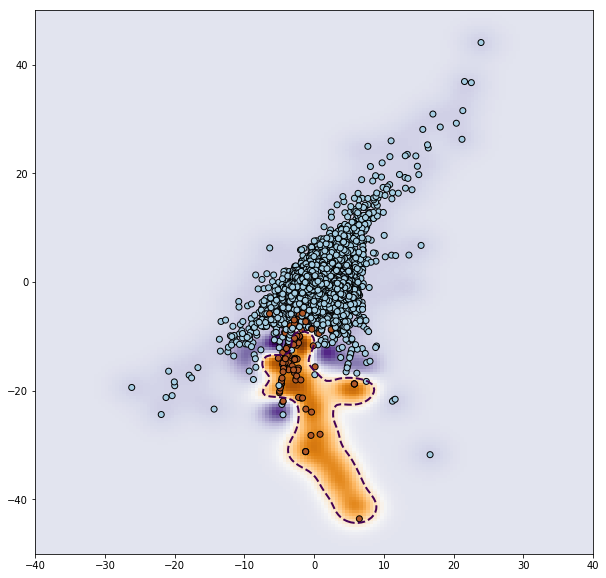

In [56]:
plt.figure(figsize=(10,10))
plt.imshow(Z, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap=plt.cm.PuOr_r)
contours = plt.contour(xx, yy, Z, levels=[0], linewidths=2,
                       linestyles='dashed')

plt.scatter(X['V6'], X['V7'], c=Y, cmap=plt.cm.Paired,edgecolors='k')
# plt.xticks(())
# plt.yticks(())
plt.axis([-40, 40, -50, 50])
plt.show()